# Análise de Pedidos do Chipotle com Pandas

Utilizaremos o pandas para carregar e explorar um dataset real de pedidos feitos no restaurante Chipotle.

## 1. Importação das bibliotecas e leitura dos dados

In [6]:
import pandas as pd

# URL com os dados no formato TSV
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# O formato TSV significa Tab-Separated Values — ou seja, um arquivo de texto plano onde os campos são separados por tabulações (em vez de vírgulas, como no CSV).

# Leitura com separador tabulação
chipo = pd.read_csv(url, sep='\t')

# Visualização inicial
print(chipo.head(3))
print(chipo.shape)
print(chipo.columns)
print(chipo.info())

   order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   
2         1         1              Nantucket Nectar            [Apple]   

  item_price  
0     $2.39   
1     $3.39   
2     $3.39   
(4622, 5)
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


## 2. Qual é o item mais vendido?

Vamos agrupar os dados por `item_name`, somar a coluna numérica `quantity`. Depois, ordenar de forma decrescente.

In [7]:
mais_vendidos = chipo.groupby('item_name').sum('quantity')
mais_vendidos = mais_vendidos.sort_values('quantity', ascending=False)
print(mais_vendidos.head(10))

                              order_id  quantity
item_name                                       
Chicken Bowl                    713926       761
Chicken Burrito                 497303       591
Chips and Guacamole             449959       506
Steak Burrito                   328437       386
Canned Soft Drink               304753       351
Chips                           208004       230
Steak Bowl                      193752       221
Bottled Water                   175944       211
Chips and Fresh Tomato Salsa    100419       130
Canned Soda                      76396       126


## 3. Qual é o tipo (variação) mais vendido?

Agora faremos o mesmo agrupamento, mas por `choice_description`.

In [8]:
m = chipo.groupby('choice_description').sum('quantity')
n = m.sort_values('quantity', ascending=False)
print(n.head(5))

                                                    order_id  quantity
choice_description                                                    
[Diet Coke]                                           123455       159
[Coke]                                                122752       143
[Sprite]                                               80426        89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     43088        49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     36041        42


## 4. Quais são as marcas de refrigerantes vendidos como '6 Pack Soft Drink'?

Vamos primeiro verificar os itens únicos e depois filtramos apenas os pedidos com `'6 Pack Soft Drink'`.

In [20]:
# Verificando os tipos de item
# print(chipo['item_name'].unique())

# Filtrando somente os refrigerantes

# Verificando os tipos de item únicos na coluna 'choice_description'
print(chipo['choice_description'].unique())

# Filtrando somente os refrigerantes
print(chipo[chipo['item_name'] == '6 Pack Soft Drink'])

# Verificando as marcas
# x2 = x1['choice_description'].unique()
# print(x2)

[nan '[Clementine]' '[Apple]' ...
 '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]'
 '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]'
 '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]']
      order_id  quantity          item_name choice_description item_price
298        129         1  6 Pack Soft Drink           [Sprite]     $6.49 
341        148         1  6 Pack Soft Drink        [Diet Coke]     $6.49 
357        154         1  6 Pack Soft Drink             [Coke]     $6.49 
388        168         1  6 Pack Soft Drink        [Diet Coke]     $6.49 
417        182         1  6 Pack Soft Drink        [Diet Coke]     $6.49 
553        230         1  6 Pack Soft Drink        [Diet Coke]     $6.49 
639        264         1  6 Pack Soft Drink        [Diet Coke]     $6.49 
721        298         1  6 Pack Soft Drink           [Nestea]     $6.49 
743        306         1  6 Pack Soft Drink             [Coke]     $6.49 
87

## 5. Quantos pedidos foram feitos?

Usamos `groupby('order_id')` e o `len()` para contar os pedidos únicos.

In [21]:
print(len(chipo.groupby('order_id')))
# Ou simplesmente:
print(chipo['order_id'].nunique())
# Ou ainda:
print(chipo['order_id'].max())

1834
1834
1834


## 6. Qual é a distribuição de itens por pedido?

Agrupamos por `order_id`, somamos os itens e extraímos estatísticas.

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
...            ...         ...
1830             2       23.00
1831             3       12.90
1832             2       13.20
1833             2       23.50
1834             3       28.75

[1834 rows x 2 columns]
18.811428571428568
11.652511696471787


<Axes: >

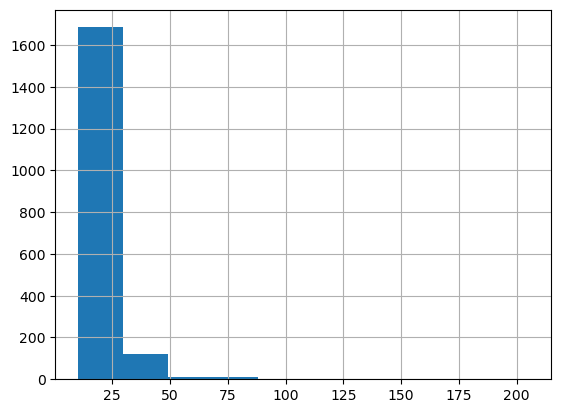

: 

In [ ]:
pedido_agrupado = chipo.groupby('order_id').sum('item_price')
print(pedido_agrupado)

# Estatísticas descritivas
print(pedido_agrupado['item_price'].mean())
print(pedido_agrupado['item_price'].std())

# Histograma
pedido_agrupado['item_price'].hist()

In [23]:
chipo['item_price'] = chipo['item_price'].astype(str)
chipo['item_price'] = (
    chipo['item_price']
    .str.replace('$', '', regex=False)
    .astype(float)
)
#chipo.info()
mais_mais = chipo.groupby('item_name').sum('item_price').sort_values('item_price', ascending=False)
print(mais_mais.head(5))

                     order_id  quantity  item_price
item_name                                          
Chicken Bowl           713926       761     7342.73
Chicken Burrito        497303       591     5575.82
Steak Burrito          328437       386     3851.43
Steak Bowl             193752       221     2260.19
Chips and Guacamole    449959       506     2201.04
